---
## Import required libraries

In [86]:
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

---
## Import the CSV data to a dataframe and drop unnecessary columns

In [87]:
df = pd.read_csv('SF_Bay_Area_Mako_Data.csv')
df = df.drop(['Unnamed: 0', 'description', 'alt'], axis=1)
df

,chemical,name,coordinates,flight,lon,lat
0,"1,1,1,2-TETRAFLUOROETHANE",TAR_Long View_200618_191334_v1s,"(-122.188079, 37.7852, 0.0)",Flight 200618a,-122.188079,37.785200
1,"1,1-DIFLUOROETHANE",TAR_Long View_200618_191334_v1s,"(-122.178125, 37.79647, 0.0)",Flight 200618a,-122.178125,37.796470
2,AMMONIA,TAR_Long View_200618_180727_v1s,"(-122.219799, 38.087409, 0.0)",Flight 200618a,-122.219799,38.087409
3,AMMONIA,TAR_Long View_200618_181921_v1s,"(-122.400814, 37.949141, 0.0)",Flight 200618a,-122.400814,37.949141
4,AMMONIA,TAR_Long View_200618_183426_v1s,"(-122.391668, 37.787369, 0.0)",Flight 200618a,-122.391668,37.787369
...,...,...,...,...,...,...
304,METHANE,TAR_Gemini_230326_235632_v1s,"(-122.140914, 38.075133, 0.0)",Flight 230326b,-122.140914,38.075133
305,METHANE,TAR_Gemini_230327_000721_v1s,"(-122.113472, 38.014515, 0.0)",Flight 230326b,-122.113472,38.014515
306,NITROUS OXIDE,TAR_Gemini_230326_233515_v1s,"(-122.36373, 37.948553, 0.0)",Flight 230326b,-122.363730,37.948553
307,PROPENE,TAR_Gemini_230326_233515_v1s,"(-122.400386, 37.949144, 0.0)",Flight 230326b,-122.400386,37.949144


---
## Visualize all the plumes on the same map

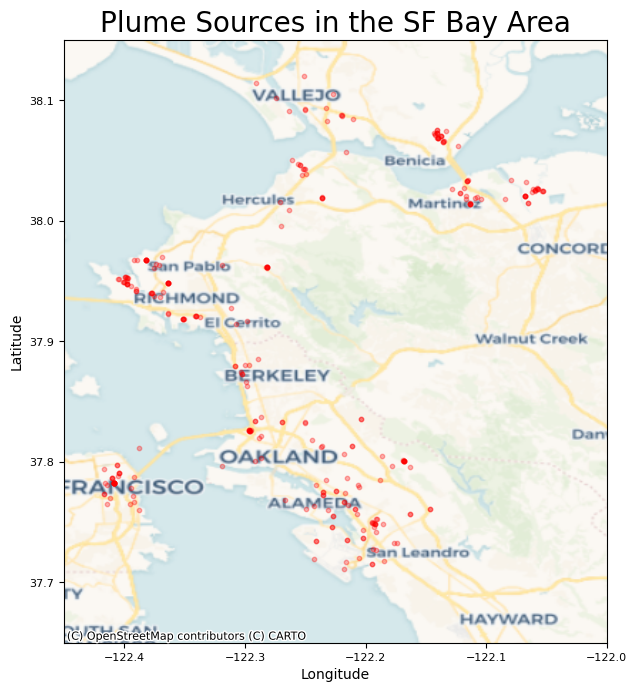

In [88]:
fig, ax = plt.subplots(figsize=(7, 10))

ax.scatter(df['lon'], df['lat'], s=10, c='red', alpha=0.3)
ax.set_xlim(-122.45, -122.00)
ax.set_ylim(37.65, 38.15)
cx.add_basemap(ax, crs = "EPSG:4326", zoom=10, source=cx.providers.CartoDB.Voyager)

plt.title('Plume Sources in the SF Bay Area', fontsize=20)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.show()

---
## Visualize the number of plumes for each chemical

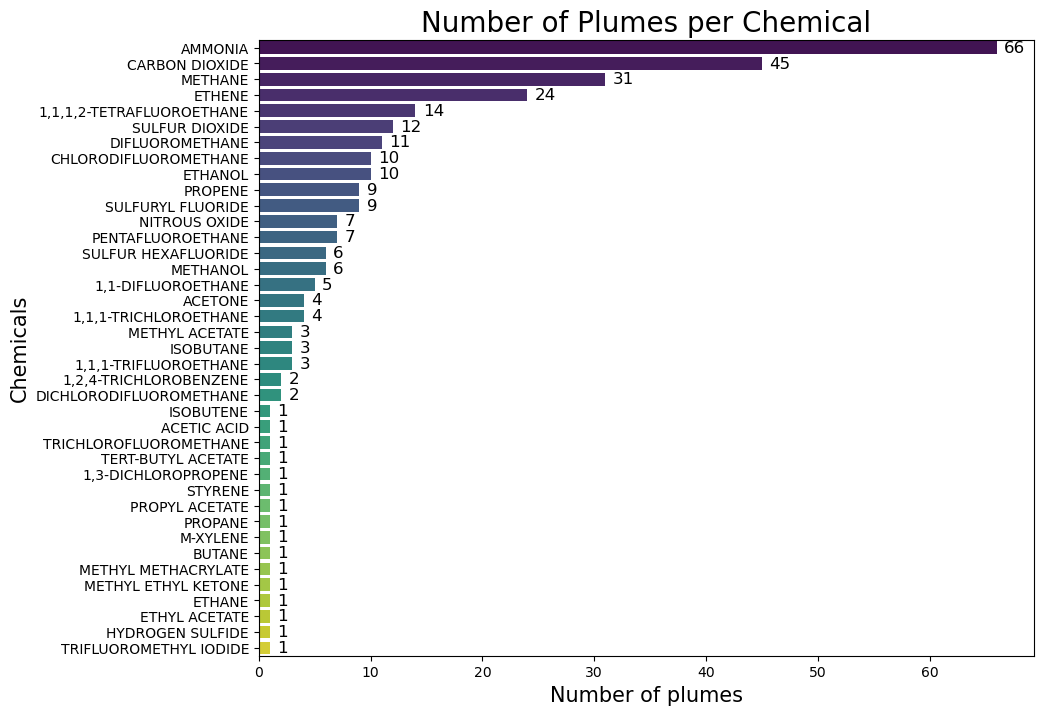

In [89]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(data=chemical_counts, x='Plumes', y='Chemical', palette='viridis')

plt.title('Number of Plumes per Chemical', fontsize=20)
plt.xlabel('Number of plumes', fontsize=15)
plt.ylabel('Chemicals', fontsize=15)

for i, (value, name) in enumerate(zip(chemical_counts['Plumes'], chemical_counts['Chemical'])):
    ax.text(value + max(chemical_counts['Plumes'])*0.01, # x-position (slightly right of bar)
            i, # y-position (aligned with current chemical)
            f'{value}', # text to display
            ha='left', # horizontal alignment
            va='center', # vertical alignment
            fontsize=12)

plt.tight_layout
plt.show()

---
## Visualize all the plumes colored by chemical (hard to distinguish so top 8 chemicals shown in next plot)

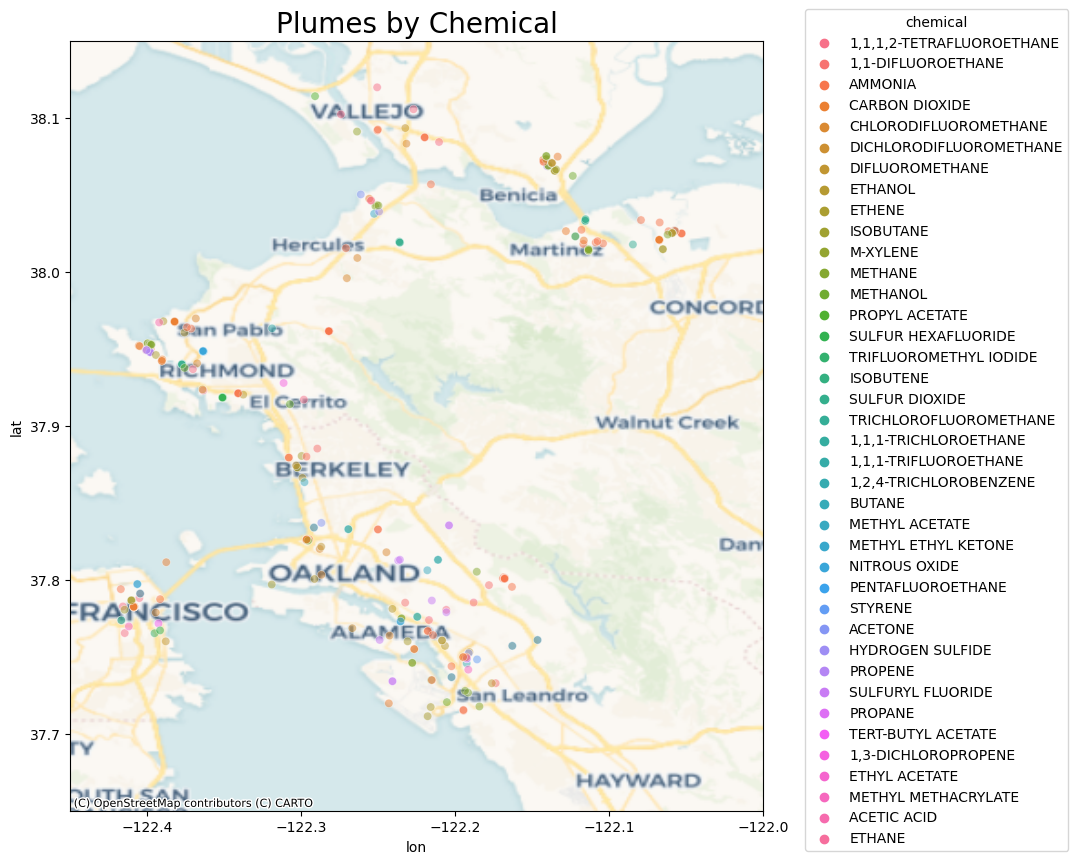

In [90]:
plt.figure(figsize=(15, 10))

ax = sns.scatterplot(x=df['lon'], y=df['lat'], hue=df['chemical'], alpha=0.5)
ax.set_xlim(-122.45, -122.00)
ax.set_ylim(37.65, 38.15)
cx.add_basemap(ax, crs = "EPSG:4326", zoom=10, source=cx.providers.CartoDB.Voyager)

ax.set_title('Plumes by Chemical', fontsize=20)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

---
## Visualize the top 8 most prevalent chemicals

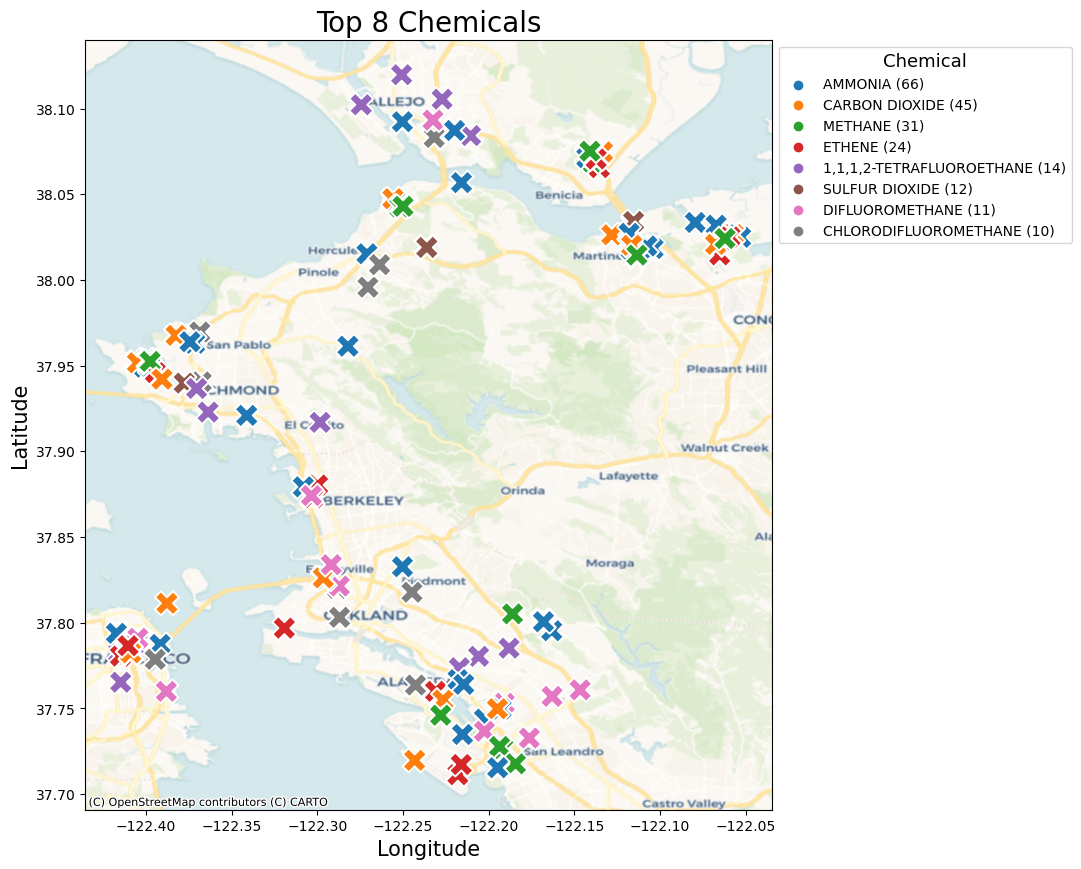

In [92]:
plt.figure(figsize=(20, 10))

top8_chems = chemical_counts['Chemical'][0:8].values
top8_counts = chemical_counts['Plumes'][0:8].values
chem_to_count = dict(zip(top8_chems, top8_counts))

df_top8 = df[df['chemical'].isin(top8_chems)]

ax = sns.scatterplot(x=df_top8['lon'], y=df_top8['lat'], hue=df_top8['chemical'], alpha=1, s=300, marker='X', hue_order=top8_chems)
cx.add_basemap(ax, crs = "EPSG:4326", source=cx.providers.CartoDB.Voyager)

handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{label} ({chem_to_count[label]})" for label in labels]
legend = ax.legend(handles, new_labels, title='Chemical', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('13')

ax.set_title('Top 8 Chemicals', fontsize=20)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

plt.show()